In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import warnings 

warnings.filterwarnings('ignore')

In [62]:
model=tf.keras.models.load_model('model_e100_filtered_1.h5')

In [63]:
import joblib

scl=joblib.load('scaler_e100_filtered_1.joblib')

In [64]:
df=pd.read_csv('selected_loans.csv')
df.head(50)

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
1,97473062,22020,2,4.120,4.120,454000.0,449471.79,360,62019,82019,...,0,8.1,2.3,2.3,2198.991139,653.56,1545.430368,13.302194,450125.35,352
2,97473062,32020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,1.5,2198.991139,655.80,1543.186479,15.542194,449471.79,351
3,97473062,42020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.3,2198.991139,0.00,1540.934899,0.000000,448815.99,350
4,97473062,52020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.1,2198.991139,0.00,1540.934899,0.000000,448815.99,349
5,97473062,62020,2,4.120,4.120,454000.0,448157.93,360,62019,82019,...,0,8.1,2.3,0.6,2198.991139,658.06,1540.934899,17.802194,448815.99,348
6,97473062,72020,2,4.120,4.120,454000.0,448157.93,360,62019,82019,...,0,8.1,2.3,1.0,2198.991139,0.00,1538.675560,0.000000,448157.93,347
7,97473062,82020,2,4.120,4.120,454000.0,448157.93,360,62019,82019,...,0,8.1,2.3,1.3,2198.991139,0.00,1538.675560,0.000000,448157.93,346
8,97473062,92020,2,4.120,4.120,454000.0,447497.62,360,62019,82019,...,0,8.1,2.3,1.4,2198.991139,660.31,1538.675560,20.052194,448157.93,345
9,97473070,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,...,0,8.1,2.3,2.5,1732.863760,457.15,1275.706500,6.786240,340188.40,354


In [65]:
ic=[]

for i in range(len(df['Loan Identifier'])):
    r=df.iloc[i,4]/1200
    p=df.iloc[i,-2]

    ic.append(p*r)   


ic

[1547.666567,
 1545.4303683333333,
 1543.186479,
 1540.934899,
 1540.934899,
 1540.934899,
 1538.6755596666667,
 1538.6755596666667,
 1538.6755596666667,
 1275.7065,
 1273.9921875,
 1272.271425,
 1270.5442125,
 1268.8105125,
 1267.070325,
 1265.3236125,
 1263.5703375,
 1261.8104999999998,
 760.9441552083333,
 760.0210145833333,
 759.0939447916667,
 758.162903125,
 757.2278895833333,
 756.2889041666666,
 755.3459041666666,
 754.3988895833332,
 753.4478177083332,
 2373.8581124999996,
 2370.5225,
 2367.1750583333333,
 2367.1750583333333,
 2367.1750583333333,
 2367.1750583333333,
 2367.1750583333333,
 2367.1750583333333,
 2367.1750583333333,
 1818.812734375,
 1816.516284375,
 1814.2105312500003,
 1811.89539375,
 1809.5708718750002,
 1807.236884375,
 1804.89343125,
 1802.5404312500002,
 1800.177884375,
 600.2874427083333,
 599.4583437499999,
 598.62621875,
 597.7910677083333,
 596.9528541666667,
 596.111578125,
 595.2672395833333,
 594.4198385416666,
 593.5693385416666,
 883.6010875,
 882.5

In [66]:
df['Interest_Component']=ic
df

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.12,4.12,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
1,97473062,22020,2,4.12,4.12,454000.0,449471.79,360,62019,82019,...,0,8.1,2.3,2.3,2198.991139,653.56,1545.430368,13.302194,450125.35,352
2,97473062,32020,2,4.12,4.12,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,1.5,2198.991139,655.80,1543.186479,15.542194,449471.79,351
3,97473062,42020,2,4.12,4.12,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.3,2198.991139,0.00,1540.934899,0.000000,448815.99,350
4,97473062,52020,2,4.12,4.12,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.1,2198.991139,0.00,1540.934899,0.000000,448815.99,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,909448355288,32015,0,4.75,4.75,76000.0,75223.99,360,42014,62014,...,0,5.3,3.1,-0.1,396.451976,99.35,298.154888,3.731358,75323.34,349
4883,909448355288,42015,0,4.75,4.75,76000.0,75124.25,360,42014,62014,...,0,5.3,3.1,-0.2,396.451976,99.74,297.761627,4.121358,75223.99,348
4884,909448355288,52015,0,4.75,4.75,76000.0,75024.12,360,42014,62014,...,0,5.3,3.1,0.0,396.451976,100.13,297.366823,4.511358,75124.25,347
4885,909448355288,62015,0,4.75,4.75,76000.0,74923.59,360,42014,62014,...,0,5.3,3.1,0.1,396.451976,100.53,296.970475,4.911358,75024.12,346


In [67]:
# top_entries = pd.DataFrame(columns=df.columns)
# grouped = df.groupby('Loan Identifier')

# for loan_id, group in grouped:
#     top_7 = group.head(7)
    
#     top_entries = top_entries.append(top_7)

# # print(top_entries)
# df=top_entries

In [68]:
# df=df.drop(['PREPAYMENT_AMT'],axis=1)

In [69]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# and has columns 'LoanID' and 'Entry'

# Define a custom function to select the top 7 entries for each loan group
def select_top_entries(group):
    return group.head(7)

# Create a new DataFrame with the top 7 entries for each loan
top_entries = df.groupby('Loan Identifier').apply(select_top_entries)

# Reset the index of the resulting DataFrame
top_entries = top_entries.reset_index(drop=True)

# Print the resulting DataFrame with the top 7 entries for each loan
# print(top_entries)
df=top_entries
df


,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.12,4.12,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
1,97473062,22020,2,4.12,4.12,454000.0,449471.79,360,62019,82019,...,0,8.1,2.3,2.3,2198.991139,653.56,1545.430368,13.302194,450125.35,352
2,97473062,32020,2,4.12,4.12,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,1.5,2198.991139,655.80,1543.186479,15.542194,449471.79,351
3,97473062,42020,2,4.12,4.12,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.3,2198.991139,0.00,1540.934899,0.000000,448815.99,350
4,97473062,52020,2,4.12,4.12,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.1,2198.991139,0.00,1540.934899,0.000000,448815.99,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,909448355288,12015,0,4.75,4.75,76000.0,75422.29,360,42014,62014,...,0,5.3,3.1,-0.1,396.451976,98.56,298.936698,2.941358,75520.85,351
3797,909448355288,22015,0,4.75,4.75,76000.0,75323.34,360,42014,62014,...,0,5.3,3.1,0.0,396.451976,98.95,298.546565,3.331358,75422.29,350
3798,909448355288,32015,0,4.75,4.75,76000.0,75223.99,360,42014,62014,...,0,5.3,3.1,-0.1,396.451976,99.35,298.154888,3.731358,75323.34,349
3799,909448355288,42015,0,4.75,4.75,76000.0,75124.25,360,42014,62014,...,0,5.3,3.1,-0.2,396.451976,99.74,297.761627,4.121358,75223.99,348


In [70]:
df.head(30)

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
1,97473062,22020,2,4.120,4.120,454000.0,449471.79,360,62019,82019,...,0,8.1,2.3,2.3,2198.991139,653.56,1545.430368,13.302194,450125.35,352
2,97473062,32020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,1.5,2198.991139,655.80,1543.186479,15.542194,449471.79,351
3,97473062,42020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.3,2198.991139,0.00,1540.934899,0.000000,448815.99,350
4,97473062,52020,2,4.120,4.120,454000.0,448815.99,360,62019,82019,...,0,8.1,2.3,0.1,2198.991139,0.00,1540.934899,0.000000,448815.99,349
5,97473062,62020,2,4.120,4.120,454000.0,448157.93,360,62019,82019,...,0,8.1,2.3,0.6,2198.991139,658.06,1540.934899,17.802194,448815.99,348
6,97473062,72020,2,4.120,4.120,454000.0,448157.93,360,62019,82019,...,0,8.1,2.3,1.0,2198.991139,0.00,1538.675560,0.000000,448157.93,347
7,97473070,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,...,0,8.1,2.3,2.5,1732.863760,457.15,1275.706500,6.786240,340188.40,354
8,97473070,22020,2,4.500,4.500,342000.0,339272.38,360,72019,92019,...,0,8.1,2.3,2.3,1732.863760,458.87,1273.992188,8.506240,339731.25,353
9,97473070,32020,2,4.500,4.500,342000.0,338811.79,360,72019,92019,...,0,8.1,2.3,1.5,1732.863760,460.59,1272.271425,10.226240,339272.38,352


In [71]:
test_pool=df.drop_duplicates(subset='Loan Identifier', keep ='first')
# test_pool=test_pool[0:1]
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
7,97473070,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,...,0,8.1,2.3,2.5,1732.863760,457.15,1275.706500,6.786240,340188.40,354
14,97473075,12020,0,5.125,5.125,179000.0,177956.14,360,52019,72019,...,0,8.1,2.3,2.5,974.631680,216.15,760.944155,5.997487,178172.29,352
21,97473078,12020,0,4.250,4.250,674000.0,669324.00,360,72019,92019,...,1,8.1,2.3,2.5,3315.674866,941.82,2373.858112,13.228467,670265.82,354
28,97473083,12020,0,4.875,4.875,451000.0,447142.47,360,62019,82019,...,0,8.1,2.3,2.5,2386.729090,565.28,1818.812734,10.738410,447707.75,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,888004279313,62015,2,4.500,4.500,102000.0,101502.17,360,122014,22015,...,0,5.3,3.1,0.1,516.819016,497.83,382.500000,363.510984,102000.00,354
3773,905254194690,32007,1,6.625,6.625,132000.0,131291.53,360,82006,102006,...,0,4.6,3.6,2.8,845.210469,708.47,728.750000,592.009531,132000.00,353
3780,906427797308,22018,1,4.750,4.750,79000.0,78596.21,360,72017,92017,...,0,3.9,2.9,2.2,412.101396,403.79,312.708333,304.396937,79000.00,353
3787,906524279035,22018,2,4.875,4.875,31000.0,30967.48,360,72017,92017,...,0,3.9,2.9,2.2,164.054549,32.52,125.937500,0.000000,31000.00,353


In [72]:
test_pool['Previous_UPB'].sum()

119541736.23

In [73]:
test_pool['Current Actual UPB'].sum()

119308646.09

In [74]:
test_pool['EMI'].sum()

605075.3530636226

In [75]:
y=test_pool.groupby(['Loan Identifier'])['Current Actual UPB'].sum()
y

Loan Identifier
97473062        450125.35
97473070        339731.25
97473075        177956.14
97473078        669324.00
97473083        447142.47
                  ...    
888004279313    101502.17
905254194690    131291.53
906427797308     78596.21
906524279035     30967.48
909448355288     75619.02
Name: Current Actual UPB, Length: 543, dtype: float64

In [76]:
li4=list(df['Current Actual UPB'])
li4

[450125.35,
 449471.79,
 448815.99,
 448815.99,
 448815.99,
 448157.93,
 448157.93,
 339731.25,
 339272.38,
 338811.79,
 338349.47,
 337885.42,
 337419.63,
 336952.09,
 177956.14,
 177739.07,
 177521.07,
 177302.14,
 177082.28,
 176861.48,
 176639.74,
 669324.0,
 668378.84,
 668378.84,
 668378.84,
 668378.84,
 668378.84,
 668378.84,
 447142.47,
 446574.9,
 446005.02,
 445432.83,
 444858.31,
 444281.46,
 443702.26,
 164422.86,
 164194.62,
 163965.55,
 163735.64,
 163504.89,
 163273.3,
 163040.87,
 197039.17,
 196808.23,
 196576.26,
 196343.25,
 196109.19,
 195874.09,
 195637.93,
 114231.27,
 114086.27,
 113940.69,
 113794.51,
 113647.74,
 113500.37,
 113352.41,
 477011.31,
 476360.41,
 475707.07,
 475051.28,
 474393.03,
 473732.31,
 473069.12,
 144335.3,
 144027.52,
 143726.81,
 143539.11,
 143236.42,
 142982.5,
 142627.55,
 200998.72,
 200695.55,
 200391.4,
 200086.27,
 199780.15,
 199473.04,
 199164.94,
 108428.58,
 108428.58,
 108111.9,
 107952.74,
 107793.04,
 107632.79,
 107471.99,

In [77]:
test_pool=test_pool[test_pool['Original UPB']!=test_pool['Current Actual UPB']]

In [78]:
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
0,97473062,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,...,0,8.1,2.3,2.5,2198.991139,651.32,1547.666567,11.062194,450776.67,353
7,97473070,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,...,0,8.1,2.3,2.5,1732.863760,457.15,1275.706500,6.786240,340188.40,354
14,97473075,12020,0,5.125,5.125,179000.0,177956.14,360,52019,72019,...,0,8.1,2.3,2.5,974.631680,216.15,760.944155,5.997487,178172.29,352
21,97473078,12020,0,4.250,4.250,674000.0,669324.00,360,72019,92019,...,1,8.1,2.3,2.5,3315.674866,941.82,2373.858112,13.228467,670265.82,354
28,97473083,12020,0,4.875,4.875,451000.0,447142.47,360,62019,82019,...,0,8.1,2.3,2.5,2386.729090,565.28,1818.812734,10.738410,447707.75,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,888004279313,62015,2,4.500,4.500,102000.0,101502.17,360,122014,22015,...,0,5.3,3.1,0.1,516.819016,497.83,382.500000,363.510984,102000.00,354
3773,905254194690,32007,1,6.625,6.625,132000.0,131291.53,360,82006,102006,...,0,4.6,3.6,2.8,845.210469,708.47,728.750000,592.009531,132000.00,353
3780,906427797308,22018,1,4.750,4.750,79000.0,78596.21,360,72017,92017,...,0,3.9,2.9,2.2,412.101396,403.79,312.708333,304.396937,79000.00,353
3787,906524279035,22018,2,4.875,4.875,31000.0,30967.48,360,72017,92017,...,0,3.9,2.9,2.2,164.054549,32.52,125.937500,0.000000,31000.00,353


In [79]:
test_pool=test_pool.drop_duplicates(subset=['Loan Identifier'],keep='first')
test_pool.columns

Index(['Loan Identifier', 'Monthly Reporting Period', 'Channel',
       'Original Interest Rate', 'Current Interest Rate', 'Original UPB',
       'Current Actual UPB', 'Original Loan Term', 'Origination Date',
       'First Payment Date', 'Remaining Months To Maturity',
       'Original Loan to Value Ratio (LTV)', 'Debt-To-Income (DTI)',
       'Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type',
       'Number of Units', 'Occupancy Status',
       'Metropolitan Statistical Area (MSA)', 'Zip Code Short',
       'Interest Only Loan Indicator', 'Current Loan Delinquency Status',
       'Modification Flag', 'Zero Balance Code', 'Special Eligibility Program',
       'Property Valuation Method', 'High Balance Loan Indicator',
       'Unemployment_rate', 'Divorce_rate', 'Inflation_rate', 'EMI',
       'UPB_diff', 'Interest_Component', 'PREPAYMENT_AMT', 'Previous_UPB',
       'Remaining MFM'],
      dtype='object')

In [80]:
test_pool.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity','PREPAYMENT_AMT'], axis=1, inplace = True)
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,82,...,0,0,2,0,0,8.1,2.3,2.5,450776.67,353
7,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,90,...,0,0,0,0,0,8.1,2.3,2.5,340188.40,354
14,12020,0,5.125,5.125,179000.0,177956.14,360,52019,72019,97,...,0,0,2,0,0,8.1,2.3,2.5,178172.29,352
21,12020,0,4.250,4.250,674000.0,669324.00,360,72019,92019,90,...,0,0,0,3,1,8.1,2.3,2.5,670265.82,354
28,12020,0,4.875,4.875,451000.0,447142.47,360,62019,82019,85,...,0,0,2,0,0,8.1,2.3,2.5,447707.75,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,62015,2,4.500,4.500,102000.0,101502.17,360,122014,22015,89,...,0,0,0,4,0,5.3,3.1,0.1,102000.00,354
3773,32007,1,6.625,6.625,132000.0,131291.53,360,82006,102006,70,...,0,0,0,4,0,4.6,3.6,2.8,132000.00,353
3780,22018,1,4.750,4.750,79000.0,78596.21,360,72017,92017,80,...,0,0,0,0,0,3.9,2.9,2.2,79000.00,353
3787,22018,2,4.875,4.875,31000.0,30967.48,360,72017,92017,80,...,0,0,0,0,0,3.9,2.9,2.2,31000.00,353


In [81]:
test_pool['Modification Flag']=test_pool['Modification Flag'].fillna(2)

In [82]:
test_pool.isnull().sum()

Monthly Reporting Period                0
Channel                                 0
Original Interest Rate                  0
Current Interest Rate                   0
Original UPB                            0
Current Actual UPB                      0
Original Loan Term                      0
Origination Date                        0
First Payment Date                      0
Original Loan to Value Ratio (LTV)      0
Debt-To-Income (DTI)                    0
Borrower Credit Score at Origination    0
First Time Home Buyer Indicator         0
Loan Purpose                            0
Property Type                           0
Number of Units                         0
Occupancy Status                        0
Metropolitan Statistical Area (MSA)     0
Zip Code Short                          0
Interest Only Loan Indicator            0
Current Loan Delinquency Status         0
Modification Flag                       0
Zero Balance Code                       0
Special Eligibility Program       

In [83]:
X_test_pool=test_pool.drop(['Current Actual UPB'],axis=1)

In [84]:
X_test_pool2=X_test_pool

In [85]:
y_test_pool=test_pool['Current Actual UPB']

In [86]:
def scale(value, att_index):
    scaled = (value - scl.mean_[att_index])/ scl.scale_[att_index]
    return scaled

In [87]:
def update(mrp):
    if((mrp//10000)==12):
        mrp = mrp - 110000 + 1
    else:
        mrp += 10000
    return mrp

In [88]:
Unemploy={"2000":4.0,
     "2001":4.7,
     "2002":5.8,
     "2003":6.0,
     "2004":5.5,
     "2005":5.1,
     "2006":4.6,
     "2007":4.6,
     "2008":5.8,
     "2009":9.3,
     "2010":9.6,
     "2011":8.9,
     "2012":8.1,
     "2013":7.4,
     "2014":6.2,
     "2015":5.3,
     "2016":4.9,
     "2017":4.4,
     "2018":3.9,
     "2019":3.7,
     "2020":8.1,
     "2021":5.3,
     "2022":3.6,
     "2023":3.4
     }

In [89]:
divorce={"2000":4.0,
     "2001":4.0,
     "2002":3.9,
     "2003":3.8,
     "2004":3.7,
     "2005":3.6,
     "2006":3.7,
     "2007":3.6,
     "2008":3.5,
     "2009":3.5,
     "2010":3.6,
     "2011":3.6,
     "2012":3.4,
     "2013":3.3,
     "2014":3.2,
     "2015":3.1,
     "2016":3.0,
     "2017":2.9,
     "2018":2.9,
     "2019":2.7,
     "2020":2.3,
     "2021":2.5,
     "2022":2.3,
     "2023":2.3
     }

In [90]:
inflation_data = {
    "12022": 7.5,
    "22022": 7.9,
    "32022": 8.5,
    "42022": 8.3,
    "52022": 8.6,
    "62022": 9.1,
    "72022": 8.5,
    "82022": 8.3,
    "92022": 8.2,
    "102022": 7.7,
    "112022": 7.1,
    "122022": 6.5,
    "12021": 1.4,
    "22021": 1.7,
    "32021": 2.6,
    "42021": 4.2,
    "52021": 5.0,
    "62021": 5.4,
    "72021": 5.4,
    "82021": 5.3,
    "92021": 5.4,
    "102021": 6.2,
    "112021": 6.8,
    "122021": 7.0,
    "12020": 2.5,
    "22020": 2.3,
    "32020": 1.5,
    "42020": 0.3,
    "52020": 0.1,
    "62020": 0.6,
    "72020": 1.0,
    "82020": 1.3,
    "92020": 1.4,
    "102020": 1.2,
    "112020": 1.2,
    "122020": 1.4,
    "12019": 1.6,
    "22019": 1.5,
    "32019": 1.9,
    "42019": 2.0,
    "52019": 1.8,
    "62019": 1.6,
    "72019": 1.8,
    "82019": 1.7,
    "92019": 1.7,
    "102019": 1.8,
    "112019": 2.1,
    "122019": 2.3,
    "12018": 2.1,
    "22018": 2.2,
    "32018": 2.4,
    "42018": 2.5,
    "52018": 2.8,
    "62018": 2.9,
    "72018": 2.9,
    "82018": 2.7,
    "92018": 2.3,
    "102018": 2.5,
    "112018": 2.2,
    "122018": 1.9,
    "12017": 2.5,
    "22017": 2.7,
    "32017": 2.4,
    "42017": 2.2,
    "52017": 1.9,
    "62017": 1.6,
    "72017": 1.7,
    "82017": 1.9,
    "92017": 2.2,
    "102017": 2.0,
    "112017": 2.2,
    "122017": 2.1,
    "12016": 1.4,
    "22016": 1.0,
    "32016": 0.9,
    "42016": 1.1,
    "52016": 1.0,
    "62016": 1.0,
    "72016": 0.8,
    "82016": 1.1,
    "92016": 1.5,
    "102016": 1.6,
    "112016": 1.7,
    "122016": 2.1,
    "12015": -0.1,
    "22015": 0.0,
    "32015": -0.1,
    "42015": -0.2,
    "52015": 0.0,
    "62015": 0.1,
    "72015": 0.2,
    "82015": 0.2,
    "92015": 0.0,
    "102015": 0.2,
    "112015": 0.5,
    "122015": 0.7,
    "12014": 1.6,
    "22014": 1.1,
    "32014": 1.5,
    "42014": 2.0,
    "52014": 2.1,
    "62014": 2.1,
    "72014": 2.0,
    "82014": 1.7,
    "92014": 1.7,
    "102014": 1.7,
    "112014": 1.3,
    "122014": 0.8,
    "12013": 1.6,
    "22013": 2.0,
    "32013": 1.5,
    "42013": 1.1,
    "52013": 1.4,
    "62013": 1.8,
    "72013": 2.0,
    "82013": 1.5,
    "92013": 1.2,
    "102013": 1.0,
    "112013": 1.2,
    "122013": 1.5,
    "12012": 2.9,
    "22012": 2.9,
    "32012": 2.7,
    "42012": 2.3,
    "52012": 1.7,
    "62012": 1.7,
    "72012": 1.4,
    "82012": 1.7,
    "92012": 2.0,
    "102012": 2.2,
    "112012": 1.8,
    "122012": 1.7,
    "12011": 1.6,
    "22011": 2.1,
    "32011": 2.7,
    "42011": 3.2,
    "52011": 3.6,
    "62011": 3.6,
    "72011": 3.6,
    "82011": 3.8,
    "92011": 3.9,
    "102011": 3.5,
    "112011": 3.4,
    "122011": 3.0,
    "12010": 2.6,
    "22010": 2.1,
    "32010": 2.3,
    "42010": 2.2,
    "52010": 2.0,
    "62010": 1.1,
    "72010": 1.2,
    "82010": 1.1,
    "92010": 1.1,
    "102010": 1.2,
    "112010": 1.1,
    "122010": 1.5,
    "12009": 0.0,
    "22009": 0.2,
    "32009": -0.4,
    "42009": -0.7,
    "52009": -1.3,
    "62009": -1.4,
    "72009": -2.1,
    "82009": -1.5,
    "92009": -1.3,
    "102009": -0.2,
    "112009": 1.8,
    "122009": 2.7,
    "12008": 4.3,
    "22008": 4.0,
    "32008": 4.0,
    "42008": 3.9,
    "52008": 4.2,
    "62008": 5.0,
    "72008": 5.6,
    "82008": 5.4,
    "92008": 4.9,
    "102008": 3.7,
    "112008": 1.1,
    "122008": 0.1,
    "12007": 2.1,
    "22007": 2.4,
    "32007": 2.8,
    "42007": 2.6,
    "52007": 2.7,
    "62007": 2.7,
    "72007": 2.4,
    "82007": 2.0,
    "92007": 2.8,
    "102007": 3.5,
    "112007": 4.3,
    "122007": 4.1,
    "12006": 4.0,
    "22006": 3.6,
    "32006": 3.4,
    "42006": 3.5,
    "52006": 4.2,
    "62006": 4.3,
    "72006": 4.1,
    "82006": 3.8,
    "92006": 2.1,
    "102006": 1.3,
    "112006": 2.0,
    "122006": 2.5,
    "12005": 3.0,
    "22005": 3.0,
    "32005": 3.1,
    "42005": 3.5,
    "52005": 2.8,
    "62005": 2.5,
    "72005": 3.2,
    "82005": 3.6,
    "92005": 4.7,
    "102005": 4.3,
    "112005": 3.5,
    "122005": 3.4,
    "12004": 1.9,
    "22004": 1.7,
    "32004": 1.7,
    "42004": 2.3,
    "52004": 3.1,
    "62004": 3.3,
    "72004": 3.0,
    "82004": 2.7,
    "92004": 2.5,
    "102004": 3.2,
    "112004": 3.5,
    "122004": 3.3,
    "12003": 2.6, 
    "22003": 3.0, 
    "32003": 3.0, 
    "42003": 2.2, 
    "52003": 2.1, 
    "62003": 2.1,
    "72003": 2.1, 
    "82003": 2.2, 
    "92003": 2.3, 
    "102003": 2.0, 
    "112003": 1.8, 
    "122003": 1.9,
    "12002": 1.1, 
    "22002": 1.1, 
    "32002": 1.5, 
    "42002": 1.6, 
    "52002": 1.2, 
    "62002": 1.1,
    "72002": 1.5, 
    "82002": 1.8, 
    "92002": 1.5, 
    "102002": 2.0, 
    "112002": 2.2, 
    "122002": 2.4,
    "12001": 3.7, 
    "22001": 3.5, 
    "32001": 2.9, 
    "42001": 3.3, 
    "52001": 3.6, 
    "62001": 3.2,
    "72001": 2.7, 
    "82001": 2.7, 
    "92001": 2.6, 
    "102001": 2.1, 
    "112001": 1.9, 
    "122001": 1.6,
    "12000": 2.7, 
    "22000": 3.2, 
    "32000": 3.8, 
    "42000": 3.1, 
    "52000": 3.2, 
    "62000": 3.7,
    "72000": 3.7, 
    "82000": 3.4, 
    "92000": 3.5, 
    "102000": 3.4, 
    "112000": 3.4, 
    "122000": 3.4,
    "12023": 6.4,
    "22023": 6.0,
    "32023": 5.0,
    "42023": 4.9
}

In [91]:
li2=[]
pc_cupb=[]

def dnn_forecast(test_pool): 
    for i in range(len(test_pool)):
        testing_x=test_pool[i:i+1]
        test_unscaled=testing_x
        testing_x=scl.transform(testing_x)

        fore=[]

        p=testing_x[0]
        # pre=p[28]
        single_entry = np.expand_dims(p, axis=0)

        for j in range(7):     
            g=model.predict(single_entry)

            # g[0][0]=g[0][0]-(296)*(j+1)
            # g[0][0]=g[0][0]*(np.exp(-0.001))

            fore.append(g[0][0])

            cal_upb=float(df['EMI'][i*7+j])-(g[0][0])*(float(test_unscaled['Current Interest Rate']))/1200
            pc_cupb.append(cal_upb)
            

            test_unscaled['Previous_UPB']=g[0][0]
            test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
            k=str(int(test_unscaled['Monthly Reporting Period']))
            k=k[::-1]
            r=k[:4]

            r=r[::-1]
            # print(r)

            if(k=="52023"):
                print("done")
                break
            
            test_unscaled['Unemployment_rate']=Unemploy[r]
            test_unscaled['Divorce_rate']=divorce[r]
            test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
            test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

            test_scaled=(scl.transform(test_unscaled))[0]
            single_entry = np.expand_dims(test_scaled, axis=0)

        li2.append(fore)

In [92]:
dnn_forecast(X_test_pool)

1/1 [==============================] - 0s 25ms/step


In [93]:
pc_cupb

[652.491630935421,
 653.6775257270879,
 654.8879903104212,
 656.1269944770877,
 657.3852038520879,
 658.6565028104212,
 659.9417496854212,
 458.9872361670293,
 460.82661116702934,
 462.66973616702944,
 464.51274397952943,
 466.37262679202945,
 468.2543064795293,
 470.15766585452934,
 212.71174331328086,
 211.74513361276001,
 210.80061212838507,
 209.88698745390593,
 208.98317234973922,
 208.07448582630172,
 207.16292983671838,
 944.8741236881688,
 947.9407643131685,
 950.9974440006686,
 954.0313242090019,
 957.0742799381687,
 960.1488893131686,
 963.2522747298353,
 568.6021559667251,
 569.3056032323502,
 570.0329176854752,
 570.7889235448501,
 571.5628297948501,
 572.3471462011,
 573.1428883886001,
 228.0990828534209,
 227.68471110862924,
 227.2940372805042,
 226.93458090029594,
 226.58839763206674,
 226.24289795758762,
 225.89996175967087,
 230.0328579026052,
 229.33711734270935,
 228.66804182187605,
 228.03486962135514,
 227.41569481666772,
 226.79498029843853,
 226.174965650001,
 14

In [94]:
li2
pred_list_upb= li2

In [95]:
li2

[[450436.75, 450091.34, 449738.78, 449377.9, 449011.44, 448641.16, 448266.8],
 [339700.4, 339209.9, 338718.4, 338226.94, 337730.97, 337229.2, 336721.62],
 [178400.77, 178627.1, 178848.25, 179062.17, 179273.8, 179486.56, 179700.0],
 [669402.56, 668536.7, 667673.6, 666817.0, 665957.8, 665089.7, 664213.44],
 [447538.94, 447365.78, 447186.75, 447000.66, 446810.16, 446617.1, 446421.22],
 [164767.39, 164881.05, 164988.2, 165086.8, 165181.75, 165276.52, 165370.58],
 [197427.33, 197582.66, 197732.03, 197873.39, 198011.62, 198150.2, 198288.62],
 [114448.19, 114515.85, 114575.57, 114625.26, 114669.77, 114712.55, 114753.05],
 [477114.03, 476566.97, 476021.03, 475477.78, 474933.28, 474384.62, 473832.1],
 [144355.19, 144188.52, 144019.78, 143848.98, 143676.05, 143500.88, 143323.45],
 [200906.1, 200507.22, 200108.81, 199713.94, 199315.0, 198906.64, 198489.52],
 [108671.72, 108752.64, 108825.81, 108889.14, 108947.47, 109004.26, 109058.95],
 [240849.36, 240807.03, 240759.05, 240703.69, 240644.92, 2405

In [96]:
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,82,...,0,0,2,0,0,8.1,2.3,2.5,450776.67,353
7,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,90,...,0,0,0,0,0,8.1,2.3,2.5,340188.40,354
14,12020,0,5.125,5.125,179000.0,177956.14,360,52019,72019,97,...,0,0,2,0,0,8.1,2.3,2.5,178172.29,352
21,12020,0,4.250,4.250,674000.0,669324.00,360,72019,92019,90,...,0,0,0,3,1,8.1,2.3,2.5,670265.82,354
28,12020,0,4.875,4.875,451000.0,447142.47,360,62019,82019,85,...,0,0,2,0,0,8.1,2.3,2.5,447707.75,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,62015,2,4.500,4.500,102000.0,101502.17,360,122014,22015,89,...,0,0,0,4,0,5.3,3.1,0.1,102000.00,354
3773,32007,1,6.625,6.625,132000.0,131291.53,360,82006,102006,70,...,0,0,0,4,0,4.6,3.6,2.8,132000.00,353
3780,22018,1,4.750,4.750,79000.0,78596.21,360,72017,92017,80,...,0,0,0,0,0,3.9,2.9,2.2,79000.00,353
3787,22018,2,4.875,4.875,31000.0,30967.48,360,72017,92017,80,...,0,0,0,0,0,3.9,2.9,2.2,31000.00,353


In [97]:
df[14:21]

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,PREPAYMENT_AMT,Previous_UPB,Remaining MFM
14,97473075,12020,0,5.125,5.125,179000.0,177956.14,360,52019,72019,...,0,8.1,2.3,2.5,974.63168,216.15,760.944155,5.997487,178172.29,352
15,97473075,22020,0,5.125,5.125,179000.0,177739.07,360,52019,72019,...,0,8.1,2.3,2.3,974.63168,217.07,760.021015,6.917487,177956.14,351
16,97473075,32020,0,5.125,5.125,179000.0,177521.07,360,52019,72019,...,0,8.1,2.3,1.5,974.63168,218.00,759.093945,7.847487,177739.07,350
17,97473075,42020,0,5.125,5.125,179000.0,177302.14,360,52019,72019,...,0,8.1,2.3,0.3,974.63168,218.93,758.162903,8.777487,177521.07,349
18,97473075,52020,0,5.125,5.125,179000.0,177082.28,360,52019,72019,...,0,8.1,2.3,0.1,974.63168,219.86,757.227890,9.707487,177302.14,348
19,97473075,62020,0,5.125,5.125,179000.0,176861.48,360,52019,72019,...,0,8.1,2.3,0.6,974.63168,220.80,756.288904,10.647487,177082.28,347
20,97473075,72020,0,5.125,5.125,179000.0,176639.74,360,52019,72019,...,0,8.1,2.3,1.0,974.63168,221.74,755.345904,11.587487,176861.48,346


In [98]:
for i in li2:
    for j in range(len(i)-1):
        print(i[j]-i[j+1])

    print('\n')

345.40625
352.5625
360.875
366.46875
370.28125
374.34375


490.5
491.5
491.46875
495.96875
501.78125
507.5625


-226.32812
-221.15625
-213.92188
-211.625
-212.76562
-213.4375


865.875
863.0625
856.625
859.1875
868.125
876.25


173.15625
179.03125
186.09375
190.5
193.0625
195.875


-113.65625
-107.15625
-98.59375
-94.953125
-94.765625
-94.0625


-155.32812
-149.375
-141.35938
-138.23438
-138.57812
-138.42188


-67.66406
-59.71875
-49.6875
-44.515625
-42.773438
-40.5


547.0625
545.9375
543.25
544.5
548.65625
552.53125


166.67188
168.73438
170.79688
172.9375
175.17188
177.42188


398.875
398.40625
394.875
398.9375
408.35938
417.125


-80.921875
-73.171875
-63.328125
-58.328125
-56.789062
-54.695312


42.328125
47.984375
55.359375
58.765625
59.421875
60.53125


415.5625
415.84375
415.15625
416.9375
420.5
423.875


281.9375
285.35938
288.875
292.35938
295.85938
299.39062


88.75
94.875
102.6875
106.5625
107.6875
109.25


368.1875
371.6875
375.28125
379.40625
384.0
388.59375


45.882812
5

In [99]:
actual_list_upb=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,6])

    actual_list_upb.append(act_list_1)

actual_list_upb

[[450125.35, 449471.79, 448815.99, 448815.99, 448815.99, 448157.93, 448157.93],
 [339731.25, 339272.38, 338811.79, 338349.47, 337885.42, 337419.63, 336952.09],
 [177956.14, 177739.07, 177521.07, 177302.14, 177082.28, 176861.48, 176639.74],
 [669324.0, 668378.84, 668378.84, 668378.84, 668378.84, 668378.84, 668378.84],
 [447142.47, 446574.9, 446005.02, 445432.83, 444858.31, 444281.46, 443702.26],
 [164422.86, 164194.62, 163965.55, 163735.64, 163504.89, 163273.3, 163040.87],
 [197039.17, 196808.23, 196576.26, 196343.25, 196109.19, 195874.09, 195637.93],
 [114231.27, 114086.27, 113940.69, 113794.51, 113647.74, 113500.37, 113352.41],
 [477011.31, 476360.41, 475707.07, 475051.28, 474393.03, 473732.31, 473069.12],
 [144335.3, 144027.52, 143726.81, 143539.11, 143236.42, 142982.5, 142627.55],
 [200998.72, 200695.55, 200391.4, 200086.27, 199780.15, 199473.04, 199164.94],
 [108428.58, 108428.58, 108111.9, 107952.74, 107793.04, 107632.79, 107471.99],
 [240562.46, 240235.29, 239906.9, 239577.28, 23

In [100]:
actual_list_pc=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,-5]-df.iloc[7*i+j,-3])

    actual_list_pc.append(act_list_1)

actual_list_pc

[[640.2578059354212,
  640.2578059354212,
  640.2578059354212,
  0.0,
  0.0,
  640.2578059354212,
  0.0],
 [450.3637596045294,
  450.3637596045294,
  450.3637596045294,
  450.3637596045294,
  450.36375960452943,
  450.36375960452943,
  450.36375960452943],
 [210.15251317005155,
  210.1525131700516,
  210.15251317005163,
  210.15251317005166,
  210.1525131700517,
  210.15251317005166,
  210.15251317005163],
 [928.5915325423357, 928.5915325423357, 0.0, 0.0, 0.0, 0.0, 0.0],
 [554.5415895604751,
  554.5415895604751,
  554.5415895604751,
  554.5415895604751,
  554.5415895604751,
  554.5415895604751,
  554.5415895604751],
 [223.6051945070667,
  223.6051945070667,
  223.60519450706667,
  223.6051945070667,
  223.6051945070667,
  223.6051945070667,
  223.60519450706673],
 [222.98859846250093,
  222.98859846250102,
  222.98859846250096,
  222.98859846250093,
  222.98859846250093,
  222.98859846250096,
  222.98859846250093],
 [141.4019574267287,
  141.4019574267287,
  141.4019574267287,
  141.40

In [101]:
actual_list_pupb=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,-2])

    actual_list_pupb.append(act_list_1)

actual_list_pupb

[[450776.67, 450125.35, 449471.79, 448815.99, 448815.99, 448815.99, 448157.93],
 [340188.4, 339731.25, 339272.38, 338811.79, 338349.47, 337885.42, 337419.63],
 [178172.29, 177956.14, 177739.07, 177521.07, 177302.14, 177082.28, 176861.48],
 [670265.82, 669324.0, 668378.84, 668378.84, 668378.84, 668378.84, 668378.84],
 [447707.75, 447142.47, 446574.9, 446005.02, 445432.83, 444858.31, 444281.46],
 [164650.27, 164422.86, 164194.62, 163965.55, 163735.64, 163504.89, 163273.3],
 [197269.08, 197039.17, 196808.23, 196576.26, 196343.25, 196109.19, 195874.09],
 [114375.68, 114231.27, 114086.27, 113940.69, 113794.51, 113647.74, 113500.37],
 [477659.78, 477011.31, 476360.41, 475707.07, 475051.28, 474393.03, 473732.31],
 [144519.78, 144335.3, 144027.52, 143726.81, 143539.11, 143236.42, 142982.5],
 [201300.92, 200998.72, 200695.55, 200391.4, 200086.27, 199780.15, 199473.04],
 [108586.11, 108428.58, 108428.58, 108111.9, 107952.74, 107793.04, 107632.79],
 [240888.41, 240562.46, 240235.29, 239906.9, 239

In [102]:
actual_list_smm=[]

for i in range(len(test_pool['Current Actual UPB'])):
    list_smm=[]

    for j in range(7):
        
        list_smm.append((actual_list_pupb[i][j]-actual_list_upb[i][j]-actual_list_pc[i][j])/actual_list_upb[i][j])

    actual_list_smm.append(list_smm)

actual_list_smm

[[2.4575807749076587e-05,
  2.9595170065237016e-05,
  3.462932339947867e-05,
  0.0,
  0.0,
  3.972303706547488e-05,
  0.0],
 [1.997531989033657e-05,
  2.5072009679850644e-05,
  3.0182658034114557e-05,
  3.533695618165918e-05,
  4.050556663693546e-05,
  4.571826599255535e-05,
  5.0975319356082966e-05],
 [3.3702050572363676e-05,
  3.891933737447472e-05,
  4.420594597558682e-05,
  4.950581436829444e-05,
  5.481907523419872e-05,
  6.020240716031945e-05,
  6.559954645522099e-05],
 [1.976392219256007e-05, 2.4789036495674964e-05, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.40156351946457e-05,
  2.9174076822216488e-05,
  3.439066770936687e-05,
  3.962081205268861e-05,
  4.490960377820861e-05,
  5.021233710608042e-05,
  5.557422772544929e-05],
 [2.3140368029949085e-05,
  2.8227511308981916e-05,
  3.332898583233072e-05,
  3.8506005735267466e-05,
  4.369780923942581e-05,
  4.8904539155874926e-05,
  5.412633956704407e-05],
 [3.5127033561263256e-05,
  4.040177353102211e-05,
  4.568914647933684e-05,
  5.104021420

In [103]:
actual_list_smm_wa=[]

for i in range(7):
    act_smm_sum=0
    upb_sum = 0 
    for j in range(len(test_pool['Current Actual UPB'])):
        act_smm_sum+=actual_list_smm[j][i]*actual_list_upb[j][i]
        upb_sum += actual_list_upb[j][i]
    actual_list_smm_wa.append(act_smm_sum/upb_sum)
actual_list_smm_wa

[0.0006532293478029169,
 0.00018604458996030455,
 0.00014439067630391136,
 0.00019960177795382459,
 0.00015986310483330043,
 0.00017613489297949167,
 0.00015952804807710158]

In [104]:
pred_list_upb

[[450436.75, 450091.34, 449738.78, 449377.9, 449011.44, 448641.16, 448266.8],
 [339700.4, 339209.9, 338718.4, 338226.94, 337730.97, 337229.2, 336721.62],
 [178400.77, 178627.1, 178848.25, 179062.17, 179273.8, 179486.56, 179700.0],
 [669402.56, 668536.7, 667673.6, 666817.0, 665957.8, 665089.7, 664213.44],
 [447538.94, 447365.78, 447186.75, 447000.66, 446810.16, 446617.1, 446421.22],
 [164767.39, 164881.05, 164988.2, 165086.8, 165181.75, 165276.52, 165370.58],
 [197427.33, 197582.66, 197732.03, 197873.39, 198011.62, 198150.2, 198288.62],
 [114448.19, 114515.85, 114575.57, 114625.26, 114669.77, 114712.55, 114753.05],
 [477114.03, 476566.97, 476021.03, 475477.78, 474933.28, 474384.62, 473832.1],
 [144355.19, 144188.52, 144019.78, 143848.98, 143676.05, 143500.88, 143323.45],
 [200906.1, 200507.22, 200108.81, 199713.94, 199315.0, 198906.64, 198489.52],
 [108671.72, 108752.64, 108825.81, 108889.14, 108947.47, 109004.26, 109058.95],
 [240849.36, 240807.03, 240759.05, 240703.69, 240644.92, 2405

In [105]:
pred_list_pupb = []
for i in range(len(test_pool['Current Actual UPB'])):
    temp_list = []
    for j in range(7):
        if(j==0):
            temp_list.append(actual_list_pupb[i][0])
        else:
            temp_list.append(pred_list_upb[i][j-1])
    pred_list_pupb.append(temp_list)
pred_list_pupb
    

[[450776.67, 450436.75, 450091.34, 449738.78, 449377.9, 449011.44, 448641.16],
 [340188.4, 339700.4, 339209.9, 338718.4, 338226.94, 337730.97, 337229.2],
 [178172.29, 178400.77, 178627.1, 178848.25, 179062.17, 179273.8, 179486.56],
 [670265.82, 669402.56, 668536.7, 667673.6, 666817.0, 665957.8, 665089.7],
 [447707.75, 447538.94, 447365.78, 447186.75, 447000.66, 446810.16, 446617.1],
 [164650.27, 164767.39, 164881.05, 164988.2, 165086.8, 165181.75, 165276.52],
 [197269.08, 197427.33, 197582.66, 197732.03, 197873.39, 198011.62, 198150.2],
 [114375.68, 114448.19, 114515.85, 114575.57, 114625.26, 114669.77, 114712.55],
 [477659.78, 477114.03, 476566.97, 476021.03, 475477.78, 474933.28, 474384.62],
 [144519.78, 144355.19, 144188.52, 144019.78, 143848.98, 143676.05, 143500.88],
 [201300.92, 200906.1, 200507.22, 200108.81, 199713.94, 199315.0, 198906.64],
 [108586.11, 108671.72, 108752.64, 108825.81, 108889.14, 108947.47, 109004.26],
 [240888.41, 240849.36, 240807.03, 240759.05, 240703.69, 24

In [106]:
pred_list_pc=[]
for i in range(len(test_pool['Current Actual UPB'])):
    temp_list = []
    for j in range(7):
        temp_list.append(pc_cupb[i*7+j])
    pred_list_pc.append(temp_list)

pred_list_pc

[[652.491630935421,
  653.6775257270879,
  654.8879903104212,
  656.1269944770877,
  657.3852038520879,
  658.6565028104212,
  659.9417496854212],
 [458.9872361670293,
  460.82661116702934,
  462.66973616702944,
  464.51274397952943,
  466.37262679202945,
  468.2543064795293,
  470.15766585452934],
 [212.71174331328086,
  211.74513361276001,
  210.80061212838507,
  209.88698745390593,
  208.98317234973922,
  208.07448582630172,
  207.16292983671838],
 [944.8741236881688,
  947.9407643131685,
  950.9974440006686,
  954.0313242090019,
  957.0742799381687,
  960.1488893131686,
  963.2522747298353],
 [568.6021559667251,
  569.3056032323502,
  570.0329176854752,
  570.7889235448501,
  571.5628297948501,
  572.3471462011,
  573.1428883886001],
 [228.0990828534209,
  227.68471110862924,
  227.2940372805042,
  226.93458090029594,
  226.58839763206674,
  226.24289795758762,
  225.89996175967087],
 [230.0328579026052,
  229.33711734270935,
  228.66804182187605,
  228.03486962135514,
  227.415694

In [107]:
predicted_list_smm=[]

for i in range(len(test_pool['Current Actual UPB'])):
    list_smm=[]

    for j in range(7):
        list_smm.append((pred_list_pupb[i][j]-pred_list_upb[i][j]-pred_list_pc[i][j])/pred_list_upb[i][j])

    predicted_list_smm.append(list_smm)

predicted_list_smm

[[-0.0006939301265614701,
  -0.0006849082525308795,
  -0.0006722246399791016,
  -0.0006570238331050297,
  -0.0006479043283882671,
  -0.0006427748520016017,
  -0.0006371160918485823],
 [8.538851676158088e-05,
  8.747795475967371e-05,
  8.511572828933196e-05,
  7.969798685969702e-05,
  8.763224562293134e-05,
  9.941886634729889e-05,
  0.00011108533390295517],
 [-0.0024730127517538377,
  -0.002452445759577052,
  -0.0024152143626140323,
  -0.0023668252094571885,
  -0.0023461776326576685,
  -0.002344688677328152,
  -0.0023405700046561957],
 [-0.0001219245761226377,
  -0.00012275431677512616,
  -0.00013170348611669147,
  -0.00014607654605236807,
  -0.0001469864578518909,
  -0.0001383631276243005,
  -0.0001309854179663978],
 [-0.0008933069783826913,
  -0.0008855155441827844,
  -0.0008743587945874408,
  -0.0008606143372856628,
  -0.0008528517636954456,
  -0.000849238982360603,
  -0.0008450939886884579],
 [-0.002095194361845113,
  -0.0020702255812786504,
  -0.002027116369205589,
  -0.0019718616

In [108]:
sum_list=[]
count = 0
for j in range (7):
    sum = 0
    for i in range(len(test_pool['Current Actual UPB'])):
        sum = sum + li2[i][count]
    sum_list.append(sum)
    count   += 1

print(sum_list)

[119384768.86523438, 119226093.43554688, 119065774.59375, 118903846.57226562, 118740233.84570312, 118574853.83789062, 118411149.53710938]


In [109]:
currentupb = list(df['Current Actual UPB'])
monthly_cupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentupb), 7):
        sum+=currentupb[i]
    monthly_cupb.append(sum)
    start+=1

monthly_cupb

[119308646.08999996,
 119136452.04999991,
 118967433.36000012,
 118782734.03999987,
 118609043.62,
 118444520.46999994,
 118269186.86000009]

In [110]:
predicted_list_smm

[[-0.0006939301265614701,
  -0.0006849082525308795,
  -0.0006722246399791016,
  -0.0006570238331050297,
  -0.0006479043283882671,
  -0.0006427748520016017,
  -0.0006371160918485823],
 [8.538851676158088e-05,
  8.747795475967371e-05,
  8.511572828933196e-05,
  7.969798685969702e-05,
  8.763224562293134e-05,
  9.941886634729889e-05,
  0.00011108533390295517],
 [-0.0024730127517538377,
  -0.002452445759577052,
  -0.0024152143626140323,
  -0.0023668252094571885,
  -0.0023461776326576685,
  -0.002344688677328152,
  -0.0023405700046561957],
 [-0.0001219245761226377,
  -0.00012275431677512616,
  -0.00013170348611669147,
  -0.00014607654605236807,
  -0.0001469864578518909,
  -0.0001383631276243005,
  -0.0001309854179663978],
 [-0.0008933069783826913,
  -0.0008855155441827844,
  -0.0008743587945874408,
  -0.0008606143372856628,
  -0.0008528517636954456,
  -0.000849238982360603,
  -0.0008450939886884579],
 [-0.002095194361845113,
  -0.0020702255812786504,
  -0.002027116369205589,
  -0.0019718616

In [111]:
actual_list_smm

[[2.4575807749076587e-05,
  2.9595170065237016e-05,
  3.462932339947867e-05,
  0.0,
  0.0,
  3.972303706547488e-05,
  0.0],
 [1.997531989033657e-05,
  2.5072009679850644e-05,
  3.0182658034114557e-05,
  3.533695618165918e-05,
  4.050556663693546e-05,
  4.571826599255535e-05,
  5.0975319356082966e-05],
 [3.3702050572363676e-05,
  3.891933737447472e-05,
  4.420594597558682e-05,
  4.950581436829444e-05,
  5.481907523419872e-05,
  6.020240716031945e-05,
  6.559954645522099e-05],
 [1.976392219256007e-05, 2.4789036495674964e-05, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.40156351946457e-05,
  2.9174076822216488e-05,
  3.439066770936687e-05,
  3.962081205268861e-05,
  4.490960377820861e-05,
  5.021233710608042e-05,
  5.557422772544929e-05],
 [2.3140368029949085e-05,
  2.8227511308981916e-05,
  3.332898583233072e-05,
  3.8506005735267466e-05,
  4.369780923942581e-05,
  4.8904539155874926e-05,
  5.412633956704407e-05],
 [3.5127033561263256e-05,
  4.040177353102211e-05,
  4.568914647933684e-05,
  5.104021420

In [112]:
previousupb = list(df['Previous_UPB'])
monthly_pupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(previousupb), 7):
        sum+=previousupb[i]
    monthly_pupb.append(sum)
    start+=1

monthly_pupb

[119541736.23000003,
 119308646.08999996,
 119136452.04999991,
 118967433.36000012,
 118782734.03999987,
 118609043.62,
 118444520.46999994]

In [113]:
pc_cupb

[652.491630935421,
 653.6775257270879,
 654.8879903104212,
 656.1269944770877,
 657.3852038520879,
 658.6565028104212,
 659.9417496854212,
 458.9872361670293,
 460.82661116702934,
 462.66973616702944,
 464.51274397952943,
 466.37262679202945,
 468.2543064795293,
 470.15766585452934,
 212.71174331328086,
 211.74513361276001,
 210.80061212838507,
 209.88698745390593,
 208.98317234973922,
 208.07448582630172,
 207.16292983671838,
 944.8741236881688,
 947.9407643131685,
 950.9974440006686,
 954.0313242090019,
 957.0742799381687,
 960.1488893131686,
 963.2522747298353,
 568.6021559667251,
 569.3056032323502,
 570.0329176854752,
 570.7889235448501,
 571.5628297948501,
 572.3471462011,
 573.1428883886001,
 228.0990828534209,
 227.68471110862924,
 227.2940372805042,
 226.93458090029594,
 226.58839763206674,
 226.24289795758762,
 225.89996175967087,
 230.0328579026052,
 229.33711734270935,
 228.66804182187605,
 228.03486962135514,
 227.41569481666772,
 226.79498029843853,
 226.174965650001,
 14

In [114]:
currentemi = list(df['EMI'])
emi = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentemi), 7):
        sum+=currentemi[i]
    emi.append(sum)
    start+=1

emi

[605075.353063622,
 605075.353063622,
 605075.353063622,
 605075.353063622,
 605075.353063622,
 605075.353063622,
 605075.353063622]

In [115]:
pc=df['EMI']-df['Interest_Component']
pc

0       651.324572
1       653.560771
2       655.804660
3       658.056240
4       658.056240
           ...    
3796     97.515278
3797     97.905411
3798     98.297088
3799     98.690349
3800     99.085153
Length: 3801, dtype: float64

In [116]:
pc_cupb

[652.491630935421,
 653.6775257270879,
 654.8879903104212,
 656.1269944770877,
 657.3852038520879,
 658.6565028104212,
 659.9417496854212,
 458.9872361670293,
 460.82661116702934,
 462.66973616702944,
 464.51274397952943,
 466.37262679202945,
 468.2543064795293,
 470.15766585452934,
 212.71174331328086,
 211.74513361276001,
 210.80061212838507,
 209.88698745390593,
 208.98317234973922,
 208.07448582630172,
 207.16292983671838,
 944.8741236881688,
 947.9407643131685,
 950.9974440006686,
 954.0313242090019,
 957.0742799381687,
 960.1488893131686,
 963.2522747298353,
 568.6021559667251,
 569.3056032323502,
 570.0329176854752,
 570.7889235448501,
 571.5628297948501,
 572.3471462011,
 573.1428883886001,
 228.0990828534209,
 227.68471110862924,
 227.2940372805042,
 226.93458090029594,
 226.58839763206674,
 226.24289795758762,
 225.89996175967087,
 230.0328579026052,
 229.33711734270935,
 228.66804182187605,
 228.03486962135514,
 227.41569481666772,
 226.79498029843853,
 226.174965650001,
 14

In [117]:
pc = list(pc)
pc_list = []

start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc), 7):
        sum+=pc[i]
    pc_list.append(sum)
    start+=1

In [118]:
pc_cupb = list(pc_cupb)
pc_list_pred = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc_cupb), 7):
        sum+=pc_cupb[i]
    pc_list_pred.append(sum)
    start+=1

In [119]:
pc_list_pred

[183959.96525436637,
 184496.6516874687,
 185038.73700161744,
 185586.18905615364,
 186139.40462455674,
 186698.8099105447,
 187252.90077941708]

In [120]:
pc_list

[183429.15354478938,
 184306.7962607477,
 184897.54179253947,
 185477.65696076438,
 186106.8248994726,
 186701.84159591427,
 187269.78455833075]

In [121]:
actual_smm=[]
act_emi=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc_list[i])/(monthly_cupb[i])
    act_emi.append(emi[i]+monthly_pupb[i]-monthly_cupb[i]-pc_list[i])
    # print(act_emi[i])
    actual_smm.append(k)

actual_smm

[0.00041623962791283517,
 -0.00010167128575906301,
 -0.00013347225660236315,
 -6.552610249365916e-06,
 -0.00010468345853444888,
 -0.00018724962123905267,
 -0.00010092378983386163]

In [122]:
act_emi

[654736.3395189138,
 592962.5968029316,
 589196.5012708777,
 604297.0161031098,
 592658.9481640232,
 582896.6614677794,
 593139.1785051477]

In [123]:
predict_previous_upb=[]

for i in range(7):
    if i==0:
        predict_previous_upb.append(monthly_pupb[i])
    else:
        predict_previous_upb.append(sum_list[i-1])

predict_previous_upb

[119541736.23000003,
 119384768.86523438,
 119226093.43554688,
 119065774.59375,
 118903846.57226562,
 118740233.84570312,
 118574853.83789062]

In [124]:
sum_list

[119384768.86523438,
 119226093.43554688,
 119065774.59375,
 118903846.57226562,
 118740233.84570312,
 118574853.83789062,
 118411149.53710938]

In [125]:
monthly_cupb

[119308646.08999996,
 119136452.04999991,
 118967433.36000012,
 118782734.03999987,
 118609043.62,
 118444520.46999994,
 118269186.86000009]

In [126]:
for i in range(7):
    print(monthly_cupb[i]-sum_list[i])

-76122.77523441613
-89641.38554696739
-98341.23374988139
-121112.53226575255
-131190.22570312023
-130333.3678906858
-141962.6771092862


In [127]:
for i in range(7):
    print(pc_list[i]-pc_list_pred[i])

-530.8117095769849
-189.85542672098381
-141.19520907796687
-108.53209538926603
-32.57972508415696
3.031685369584011
16.883778913674178


In [128]:
for i in range(7):
    print((predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])-(monthly_pupb[i]-monthly_cupb[i]-pc_list[i]))

-76653.58694399311
-13708.465739272244
-8841.043411991966
-22879.830611260433
-10110.273162451835
859.8894978040189
-11612.425439686718


In [129]:
for i in range(7):
    print((monthly_pupb[i]-monthly_cupb[i]-pc_list[i]))

49660.98645528572
-12112.75626069645
-15878.851792750473
-778.3369605182088
-12416.40489960491
-22178.691595848708
-11936.174558480358


In [130]:
for i in range(7):
    print((predict_previous_upb[i]-sum_list[i]-pc_list_pred[i]))

-26992.600488707394
-25821.221999968693
-24719.89520474244
-23658.167571778642
-22526.678062056744
-21318.80209804469
-23548.599998167076


In [131]:
for i in range(7):
    print((predict_previous_upb[i]))

119541736.23000003
119384768.86523438
119226093.43554688
119065774.59375
118903846.57226562
118740233.84570312
118574853.83789062


In [132]:
for i in range(7):
    print((monthly_pupb[i]))

119541736.23000003
119308646.08999996
119136452.04999991
118967433.36000012
118782734.03999987
118609043.62
118444520.46999994


In [133]:
sum_list

[119384768.86523438,
 119226093.43554688,
 119065774.59375,
 118903846.57226562,
 118740233.84570312,
 118574853.83789062,
 118411149.53710938]

In [134]:
predicted_smm=[]
pred_emi=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])/(sum_list[i])
    pred_emi.append(emi[i]+predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])
    # print(pred_emi[i])
    predicted_smm.append(k)

predicted_smm

[-0.00022609752270138887,
 -0.00021657358096638079,
 -0.00020761545699497794,
 -0.0001989689001137573,
 -0.00018971394389646405,
 -0.00017979193233660356,
 -0.00019887147528102562]

In [135]:
pred_emi

[578082.7525749207,
 579254.1310636594,
 580355.4578588856,
 581417.1854918494,
 582548.6750015713,
 583756.5509655834,
 581526.7530654611]

In [136]:
predicted_prepaid_amt=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])
    predicted_prepaid_amt.append(k)

predicted_prepaid_amt

[-26992.600488707394,
 -25821.221999968693,
 -24719.89520474244,
 -23658.167571778642,
 -22526.678062056744,
 -21318.80209804469,
 -23548.599998167076]

In [137]:
actual_prepaid_amt=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc_list[i])
    actual_prepaid_amt.append(k)

actual_prepaid_amt

[49660.98645528572,
 -12112.75626069645,
 -15878.851792750473,
 -778.3369605182088,
 -12416.40489960491,
 -22178.691595848708,
 -11936.174558480358]

In [138]:
for i in range(len(predict_previous_upb)):
    print(predict_previous_upb[i]-sum_list[i])

156967.36476565897
158675.4296875
160318.841796875
161928.021484375
163612.7265625
165380.0078125
163704.30078125


In [139]:
pc_list_pred

[183959.96525436637,
 184496.6516874687,
 185038.73700161744,
 185586.18905615364,
 186139.40462455674,
 186698.8099105447,
 187252.90077941708]

In [140]:
pc_list

[183429.15354478938,
 184306.7962607477,
 184897.54179253947,
 185477.65696076438,
 186106.8248994726,
 186701.84159591427,
 187269.78455833075]

In [141]:
actual_list_smm

[[2.4575807749076587e-05,
  2.9595170065237016e-05,
  3.462932339947867e-05,
  0.0,
  0.0,
  3.972303706547488e-05,
  0.0],
 [1.997531989033657e-05,
  2.5072009679850644e-05,
  3.0182658034114557e-05,
  3.533695618165918e-05,
  4.050556663693546e-05,
  4.571826599255535e-05,
  5.0975319356082966e-05],
 [3.3702050572363676e-05,
  3.891933737447472e-05,
  4.420594597558682e-05,
  4.950581436829444e-05,
  5.481907523419872e-05,
  6.020240716031945e-05,
  6.559954645522099e-05],
 [1.976392219256007e-05, 2.4789036495674964e-05, 0.0, 0.0, 0.0, 0.0, 0.0],
 [2.40156351946457e-05,
  2.9174076822216488e-05,
  3.439066770936687e-05,
  3.962081205268861e-05,
  4.490960377820861e-05,
  5.021233710608042e-05,
  5.557422772544929e-05],
 [2.3140368029949085e-05,
  2.8227511308981916e-05,
  3.332898583233072e-05,
  3.8506005735267466e-05,
  4.369780923942581e-05,
  4.8904539155874926e-05,
  5.412633956704407e-05],
 [3.5127033561263256e-05,
  4.040177353102211e-05,
  4.568914647933684e-05,
  5.104021420

In [142]:
actual_smm

[0.00041623962791283517,
 -0.00010167128575906301,
 -0.00013347225660236315,
 -6.552610249365916e-06,
 -0.00010468345853444888,
 -0.00018724962123905267,
 -0.00010092378983386163]

In [143]:
predicted_smm

[-0.00022609752270138887,
 -0.00021657358096638079,
 -0.00020761545699497794,
 -0.0001989689001137573,
 -0.00018971394389646405,
 -0.00017979193233660356,
 -0.00019887147528102562]

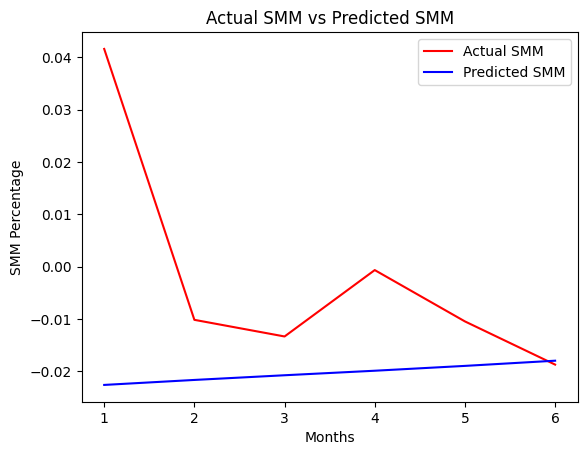

In [144]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 7) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)



plt.plot(months, act_smm[:6]*100, label='Actual SMM',color='red')
plt.plot(months, pred_smm[:6]*100, label='Predicted SMM',color='blue')

plt.xlabel('Months')
plt.ylabel('SMM Percentage')
plt.title('Actual SMM vs Predicted SMM')

# plt.yticks(np.arange(-1,1,0.1))

plt.legend()

plt.show()


In [187]:
np.mean(act_smm)

-0.0031187627757902864

In [188]:
np.mean(pred_smm)

-0.02025189731843712

In [145]:
pred_smm

array([-0.0002261 , -0.00021657, -0.00020762, -0.00019897, -0.00018971,
       -0.00017979, -0.00019887])

In [146]:
act_smm

array([ 4.16239628e-04, -1.01671286e-04, -1.33472257e-04, -6.55261025e-06,
       -1.04683459e-04, -1.87249621e-04, -1.00923790e-04])

In [147]:
act_smm-pred_smm

array([ 6.42337151e-04,  1.14902295e-04,  7.41432004e-05,  1.92416290e-04,
        8.50304854e-05, -7.45768890e-06,  9.79476854e-05])

In [148]:
actual_smm
for i in range(len(actual_smm)):
    # if actual_smm[i]<0:
    #     actual_smm[i]=0
    actual_smm[i]=actual_smm[i]

In [149]:
predicted_smm
for i in range(len(predicted_smm)):
    # if predicted_smm[i]<0:
    #     predicted_smm[i]=0
    predicted_smm[i]=predicted_smm[i]

predicted_smm

[-0.00022609752270138887,
 -0.00021657358096638079,
 -0.00020761545699497794,
 -0.0001989689001137573,
 -0.00018971394389646405,
 -0.00017979193233660356,
 -0.00019887147528102562]

In [150]:
actual_cpr=[]
predicted_cpr=[]


for i in range(7):
    acpr=1-pow(1-act_smm[i],12)
    pcpr=1-pow(1-pred_smm[i],12)

    actual_cpr.append(acpr)
    predicted_cpr.append(pcpr)
    

In [151]:
for i in range(len(li2)):
    print(i+1)
    for j in range(len(li2[0])):
        print(li2[i][j]-actual_list_upb[i][j])
    print('\n')

1
311.4000000000233
619.553750000021
922.7912500000093
561.9162500000093
195.4475000000093
483.226250000007
108.88250000000698


2
-30.84375
-62.47375000000466
-93.38374999997905
-122.53249999997206
-154.4512499999837
-190.44250000000466
-230.4650000000256


3
444.62562499998603
888.023749999993
1327.179999999993
1760.031874999986
2191.516875000001
2625.0824999999895
3060.2600000000093


4
78.5625
157.8475000000326
-705.2149999999674
-1561.8399999999674
-2421.0274999999674
-3289.1524999999674
-4165.402499999967


5
396.46750000002794
790.8812499999767
1181.7299999999814
1567.8262499999837
1951.8462500000023
2335.633749999979
2718.9587499999907


6
344.53062500001397
686.4268750000047
1022.6531250000116
1351.156874999986
1676.859999999986
2003.2156250000116
2329.7081250000047


7
388.1581249999872
774.4262499999895
1155.7712499999907
1530.140625
1902.4349999999977
2276.1131250000035
2650.695000000007


8
216.91749999999593
429.5815624999959
634.8803124999977
830.7478125000052
1022.03343

In [152]:
actual_cpr

[0.004983456527337782,
 -0.001220737905700986,
 -0.001602843382156216,
 -7.863415687570097e-05,
 -0.0012569250242033814,
 -0.0022493110196328825,
 -0.001211757954561632]

In [153]:
predicted_cpr

[-0.0027165467424223877,
 -0.002601980879141097,
 -0.0024942323294074864,
 -0.0023902413841931924,
 -0.002278944260686977,
 -0.002159637926321123,
 -0.0023890697255237736]

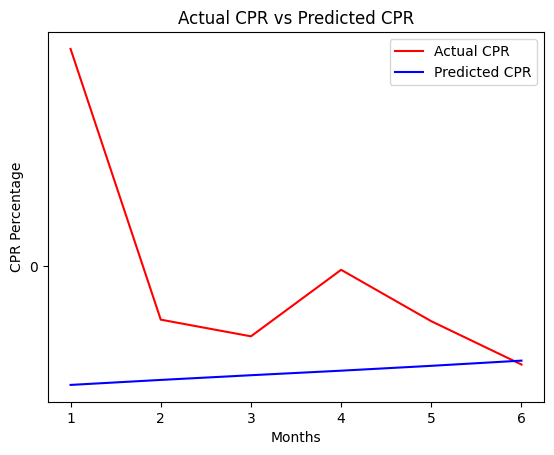

In [154]:
months = np.arange(1, 7) 

act_cpr=np.asarray(actual_cpr)
pred_cpr=np.asarray(predicted_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, act_cpr[:6]*100, label='Actual CPR',color='red')
plt.plot(months, pred_cpr[:6]*100, label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

plt.yticks(np.arange(0,1,1))

plt.legend()

plt.show()

In [155]:
np.mean(act_cpr)

-0.00037667898797043097

In [156]:
np.mean(pred_cpr)

-0.002432950463956577

In [157]:
actual_rolling_cpr=[]
predicted_rolling_cpr=[]

for i in range(len(act_smm)):
    k=1
    for j in range(i+1):
        k=k*(1-act_smm[j])

    val=1-pow(k,12/(i+1))
    actual_rolling_cpr.append(val)

for i in range(len(pred_smm)):
    k=1
    for j in range(i+1):
        k=k*(1-pred_smm[j])

    val=1-pow(k,12/(i+1))
    predicted_rolling_cpr.append(val)

In [158]:
actual_rolling_cpr

[0.004983456527337782,
 0.001886179895259077,
 0.0007245246536288219,
 0.0005237954412485868,
 0.0001679048873496347,
 -0.00023455920168102828,
 -0.000374100608226291]

In [159]:
predicted_rolling_cpr

[-0.0027165467424223877,
 -0.002659262174466326,
 -0.002604249207768472,
 -0.0025507429688049754,
 -0.002496377331295818,
 -0.0024402462405856973,
 -0.0024329351498988405]

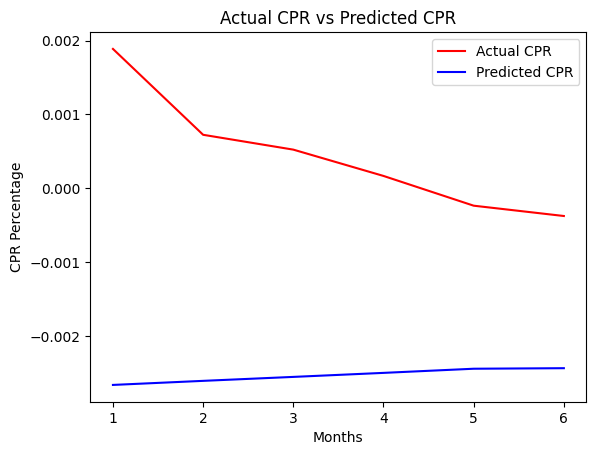

In [160]:
months = np.arange(1, 7) 

actual_rolling_cpr=np.asarray(actual_rolling_cpr)
predicted_rolling_cpr=np.asarray(predicted_rolling_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, actual_rolling_cpr[1:], label='Actual CPR',color='red')
plt.plot(months, predicted_rolling_cpr[1:], label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

# plt.yticks(np.arange(0, 0.1,0.01))

plt.legend()

plt.show()

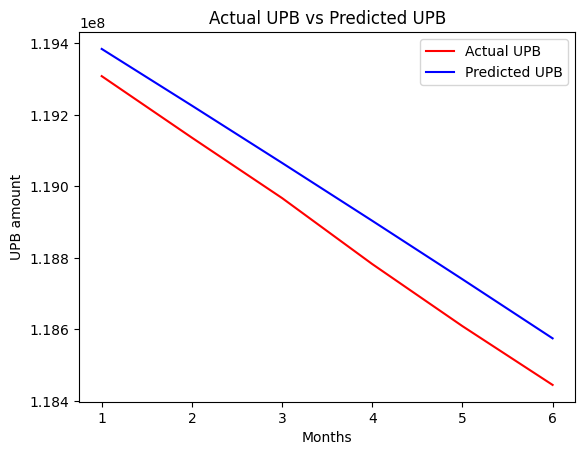

In [161]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1,7) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)

act_smm=act_smm*100
pred_smm=pred_smm*100

plt.plot(months, monthly_cupb[:6], label='Actual UPB',color='red')
plt.plot(months, sum_list[:6], label='Predicted UPB',color='blue')

plt.xlabel('Months')
plt.ylabel('UPB amount')
plt.title('Actual UPB vs Predicted UPB')

# plt.yticks(np.arange(0, 10000000, 1000))

plt.legend()

plt.show()


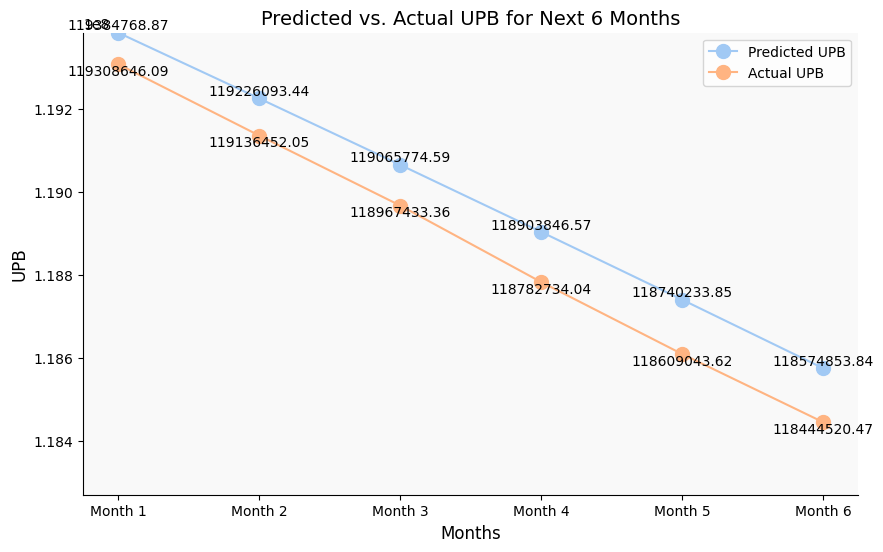

In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the next 7 months
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6']

# Generating colors for the plot
colors = sns.color_palette('pastel')[0:2]

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the predicted and actual UPB values
ax.plot(months, sum_list[:6], marker='o', markersize=10, linestyle='-', color=colors[0], label='Predicted UPB')
ax.plot(months, monthly_cupb[:6], marker='o', markersize=10, linestyle='-', color=colors[1], label='Actual UPB')

# Adding value annotations for predicted UPB
for i in range(len(months)):
    ax.text(i, sum_list[i], f'{sum_list[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding value annotations for actual UPB
for i in range(len(months)):
    ax.text(i, monthly_cupb[i], f'{monthly_cupb[i]:.2f}', ha='center', va='top', fontsize=10)

# Customizing the plot aesthetics
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('UPB', fontsize=12)
ax.set_title('Predicted vs. Actual UPB for Next 6 Months', fontsize=14)
ax.legend(fontsize=10)

# Adjusting the y-axis limits
ax.set_ylim([min(np.min(sum_list), np.min(monthly_cupb)) - 100, max(np.max(sum_list), np.max(monthly_cupb)) + 100])

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a background color to the plot
ax.set_facecolor('#F9F9F9')

# Showing the plot
plt.show()


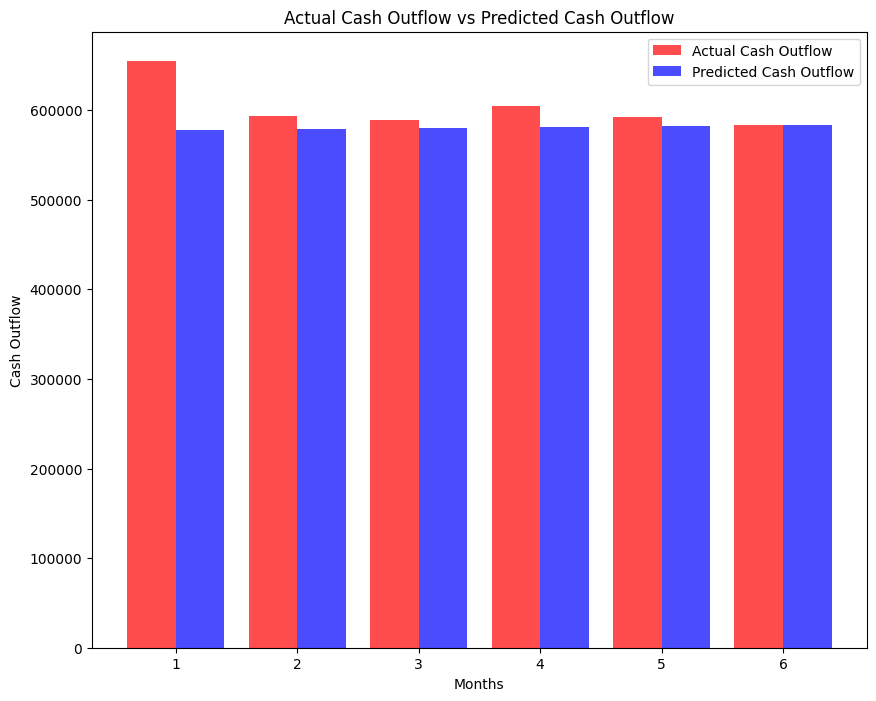

In [163]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 7)
bar_width = 0.4  # Width of each bar

plt.figure(figsize=(10,8))

plt.bar(months - bar_width/2, act_emi[:6], label='Actual Cash Outflow', color='red', width=bar_width, alpha=0.7)
plt.bar(months + bar_width/2, pred_emi[:6], label='Predicted Cash Outflow', color='blue', width=bar_width, alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Cash Outflow')
plt.title('Actual Cash Outflow vs Predicted Cash Outflow')

plt.legend()
plt.show()


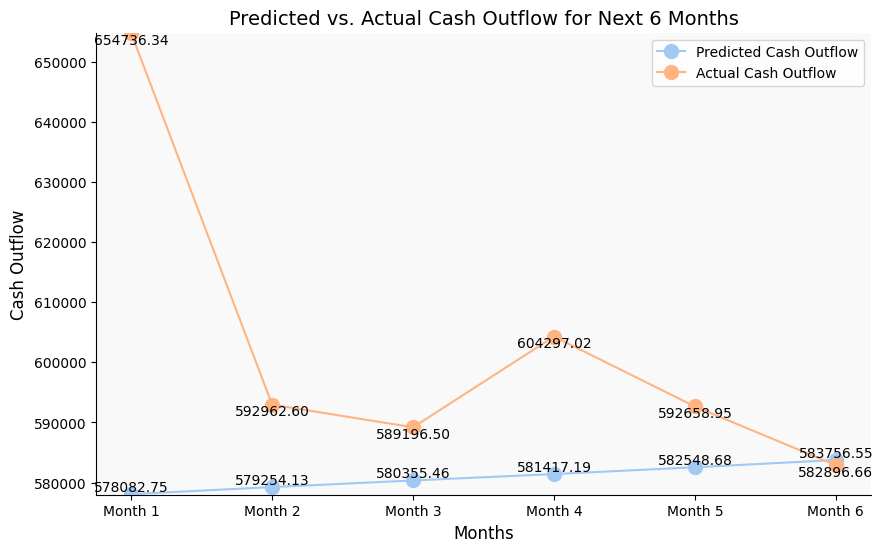

In [164]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the next 7 months
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6']

# Generating colors for the plot
colors = sns.color_palette('pastel')[0:2]

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the predicted and actual Cash Outflow values
ax.plot(months, pred_emi[:6], marker='o', markersize=10, linestyle='-', color=colors[0], label='Predicted Cash Outflow')
ax.plot(months, act_emi[:6], marker='o', markersize=10, linestyle='-', color=colors[1], label='Actual Cash Outflow')

# Adding value annotations for predicted Cash Outflow
for i in range(len(months)):
    ax.text(i, pred_emi[i], f'{pred_emi[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding value annotations for actual Cash Outflow
for i in range(len(months)):
    ax.text(i, act_emi[i], f'{act_emi[i]:.2f}', ha='center', va='top', fontsize=10)

# Customizing the plot aesthetics
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Cash Outflow', fontsize=12)
ax.set_title('Predicted vs. Actual Cash Outflow for Next 6 Months', fontsize=14)
ax.legend(fontsize=10)

# Adjusting the y-axis limits
ax.set_ylim([min(np.min(pred_emi), np.min(act_emi)) - 100, max(np.max(pred_emi), np.max(act_emi)) + 100])

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a background color to the plot
ax.set_facecolor('#F9F9F9')

# Showing the plot
plt.show()


In [165]:
act_emi

[654736.3395189138,
 592962.5968029316,
 589196.5012708777,
 604297.0161031098,
 592658.9481640232,
 582896.6614677794,
 593139.1785051477]

In [166]:
pred_emi

[578082.7525749207,
 579254.1310636594,
 580355.4578588856,
 581417.1854918494,
 582548.6750015713,
 583756.5509655834,
 581526.7530654611]

In [167]:
for i in range(6):
    print(sum_list[i]-sum_list[i+1])

158675.4296875
160318.841796875
161928.021484375
163612.7265625
165380.0078125
163704.30078125


In [168]:
for i in range(6):
    print(monthly_cupb[i]-monthly_cupb[i+1])

172194.04000005126
169018.689999789
184699.32000024617
173690.41999986768
164523.15000006557
175333.6099998504


In [169]:
for i in range(6):
    print(monthly_cupb[i]-sum_list[i])

-76122.77523441613
-89641.38554696739
-98341.23374988139
-121112.53226575255
-131190.22570312023
-130333.3678906858


In [170]:
monthly_cupb

[119308646.08999996,
 119136452.04999991,
 118967433.36000012,
 118782734.03999987,
 118609043.62,
 118444520.46999994,
 118269186.86000009]

In [171]:
sum_list

[119384768.86523438,
 119226093.43554688,
 119065774.59375,
 118903846.57226562,
 118740233.84570312,
 118574853.83789062,
 118411149.53710938]

In [172]:
len(test_pool['Original UPB'])
# test_pool

543

In [173]:
def_act=[]

for i in range(7):
    default=0

    for j in range(len(actual_list_smm)):
        if actual_list_smm[j][i]<0:
            default=default+1
    
    def_act.append(default)

def_act

[3, 4, 2, 0, 0, 1, 0]

In [174]:
def_pred=[]

for j in range(7):
    default=0

    for j in range(len(predicted_list_smm)):
        if predicted_list_smm[j][i]<0:
            default=default+1

    def_pred.append(default)

def_pred

[273, 273, 273, 273, 273, 273, 273]

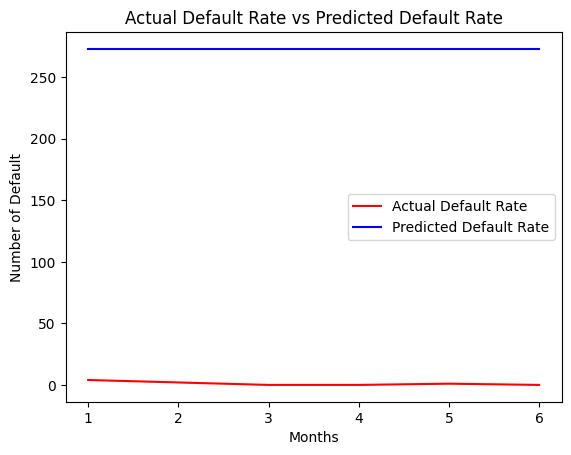

In [175]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 7) 

plt.plot(months, def_act[1:], label='Actual Default Rate',color='red')
plt.plot(months, def_pred[1:], label='Predicted Default Rate',color='blue')

plt.xlabel('Months')
plt.ylabel('Number of Default')
plt.title('Actual Default Rate vs Predicted Default Rate')

# plt.yticks(np.arange(0, 1000000, 10000))

plt.legend()

plt.show()


In [176]:
li3=[]

for i in li2:
    li3=li3+i

In [177]:
li3

[450436.75,
 450091.34,
 449738.78,
 449377.9,
 449011.44,
 448641.16,
 448266.8,
 339700.4,
 339209.9,
 338718.4,
 338226.94,
 337730.97,
 337229.2,
 336721.62,
 178400.77,
 178627.1,
 178848.25,
 179062.17,
 179273.8,
 179486.56,
 179700.0,
 669402.56,
 668536.7,
 667673.6,
 666817.0,
 665957.8,
 665089.7,
 664213.44,
 447538.94,
 447365.78,
 447186.75,
 447000.66,
 446810.16,
 446617.1,
 446421.22,
 164767.39,
 164881.05,
 164988.2,
 165086.8,
 165181.75,
 165276.52,
 165370.58,
 197427.33,
 197582.66,
 197732.03,
 197873.39,
 198011.62,
 198150.2,
 198288.62,
 114448.19,
 114515.85,
 114575.57,
 114625.26,
 114669.77,
 114712.55,
 114753.05,
 477114.03,
 476566.97,
 476021.03,
 475477.78,
 474933.28,
 474384.62,
 473832.1,
 144355.19,
 144188.52,
 144019.78,
 143848.98,
 143676.05,
 143500.88,
 143323.45,
 200906.1,
 200507.22,
 200108.81,
 199713.94,
 199315.0,
 198906.64,
 198489.52,
 108671.72,
 108752.64,
 108825.81,
 108889.14,
 108947.47,
 109004.26,
 109058.95,
 240849.36,
 

In [178]:
li3

[450436.75,
 450091.34,
 449738.78,
 449377.9,
 449011.44,
 448641.16,
 448266.8,
 339700.4,
 339209.9,
 338718.4,
 338226.94,
 337730.97,
 337229.2,
 336721.62,
 178400.77,
 178627.1,
 178848.25,
 179062.17,
 179273.8,
 179486.56,
 179700.0,
 669402.56,
 668536.7,
 667673.6,
 666817.0,
 665957.8,
 665089.7,
 664213.44,
 447538.94,
 447365.78,
 447186.75,
 447000.66,
 446810.16,
 446617.1,
 446421.22,
 164767.39,
 164881.05,
 164988.2,
 165086.8,
 165181.75,
 165276.52,
 165370.58,
 197427.33,
 197582.66,
 197732.03,
 197873.39,
 198011.62,
 198150.2,
 198288.62,
 114448.19,
 114515.85,
 114575.57,
 114625.26,
 114669.77,
 114712.55,
 114753.05,
 477114.03,
 476566.97,
 476021.03,
 475477.78,
 474933.28,
 474384.62,
 473832.1,
 144355.19,
 144188.52,
 144019.78,
 143848.98,
 143676.05,
 143500.88,
 143323.45,
 200906.1,
 200507.22,
 200108.81,
 199713.94,
 199315.0,
 198906.64,
 198489.52,
 108671.72,
 108752.64,
 108825.81,
 108889.14,
 108947.47,
 109004.26,
 109058.95,
 240849.36,
 

In [179]:
li4=np.asarray(li4)
li3=np.asarray(li3)
li5=abs(li4-li3)
li5.mean()

585.2093615578137

In [180]:
pre_upb=np.sum(li4)
cur_upb=np.sum(li3)

In [181]:
pre_upb

831518016.49

In [182]:
cur_upb

832306700.0

In [183]:
(cur_upb-pre_upb)/pre_upb

0.0009484719445155584

In [184]:
len(li4[0:31])

31

In [185]:
test_pool[0:5]

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,12020,2,4.120,4.120,454000.0,450125.35,360,62019,82019,82,...,0,0,2,0,0,8.1,2.3,2.5,450776.67,353
7,12020,2,4.500,4.500,342000.0,339731.25,360,72019,92019,90,...,0,0,0,0,0,8.1,2.3,2.5,340188.40,354
14,12020,0,5.125,5.125,179000.0,177956.14,360,52019,72019,97,...,0,0,2,0,0,8.1,2.3,2.5,178172.29,352
21,12020,0,4.250,4.250,674000.0,669324.00,360,72019,92019,90,...,0,0,0,3,1,8.1,2.3,2.5,670265.82,354
28,12020,0,4.875,4.875,451000.0,447142.47,360,62019,82019,85,...,0,0,2,0,0,8.1,2.3,2.5,447707.75,353


In [186]:
(testing_x)

NameError: name 'testing_x' is not defined

In [ ]:
testing_x[0]

array([-1.02954984,  0.84383406, -1.55350925, -1.31814191,  3.66609448,
        0.60030419, -1.61128169, -1.01986277,  0.19222231,  0.34209664,
        0.81302176, -0.42491108,  1.32517563,  0.48097901, -0.15472204,
        0.08211211, -0.53040637,  0.90130701, -0.39673819, -0.12827818,
       -0.1805408 , -0.11415215, -0.16041107, -0.15799407,  9.77825071,
       -0.33494945, -1.22110499,  0.08337639,  3.88398382,  0.96277591])

In [ ]:
fore=[]

p=testing_x[0]
pre=p[28]
single_entry = np.expand_dims(p, axis=0)

In [ ]:
for i in range(6): 
    # print(i)   
    g=model.predict(single_entry)
    fore.append(g[0][0])

    print(g[0][0])

    test_unscaled['Previous_UPB']=g[0][0]
    test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
    k=str(int(test_unscaled['Monthly Reporting Period']))
    k=k[::-1]
    r=k[:4]

    r=r[::-1]
    print(r)

    if(k=="52023"):
        print("done")
        break
    
    test_unscaled['Unemployment_rate']=Unemploy[r]
    test_unscaled['Divorce_rate']=divorce[r]
    test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
    test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

    # l=single_entry[0]
    # l[-1]=scale(l[-1]-1,29)
    # print(l[0])
    # l[0]=update(l[0])
    # print(l[0])
    
    # print(k)
    # l[25]=Unemploy[r]
    # l[25]=scale(l[25],25)
    # # l[-1]=(l[-1]-1-270.868240)/90.489321
    # # l[0]=(update(l[0])-67492.295858)/34497.797429	
    # l[28]=scale(g, scl.mean_[28], scl.scale_[28])
    # l[0]=scale(l[0],0)

    # print(test_unscaled)
    
    test_scaled=(scl.transform(test_unscaled))[0]
    single_entry = np.expand_dims(test_scaled, axis=0)

1/1 [==============================] - 0s 25ms/step
596653.2
2021
1/1 [==============================] - 0s 23ms/step
596030.1
2021
1/1 [==============================] - 0s 28ms/step
595358.56
2021
1/1 [==============================] - 0s 25ms/step
594685.25
2021
1/1 [==============================] - 0s 28ms/step
594009.0
2021
1/1 [==============================] - 0s 57ms/step
593329.4
2021


In [ ]:
fore

[596653.2, 596030.1, 595358.56, 594685.25, 594009.0, 593329.4]

In [ ]:
# def update(mrp):
#     new_mrp = int(mrp)
#     if((new_mrp//10000)==12):
#         new_mrp = new_mrp - 110000 + 1
#     else:
#         new_mrp += 10000
#     return new_mrp
# print(update('122002'))

In [ ]:
test1_y

NameError: name 'test1_y' is not defined

In [ ]:
for i in range(len(fore)):
    print(fore[i]-test1_y[i])

-346.8125
30.125
358.5625
685.25
2009.0
2329.375


In [ ]:
# X_train_1.describe()

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),Debt-To-Income (DTI),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
count,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,...,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.00000,804139.000000,804139.000000,804139.000000,804139.000000
mean,67492.295858,1.398669,5.112216,4.983585,187677.681346,312.137781,67319.894812,66955.339365,71.578742,34.126307,...,0.051592,0.018257,0.046860,3.242918,0.010346,5.93966,3.128324,2.439492,170358.980081,270.868240
std,34497.797429,0.713811,1.361030,1.504040,111821.292224,79.729861,34307.612765,34256.668292,17.715732,11.308050,...,0.287244,0.160058,0.292056,1.543653,0.101190,1.90471,0.514733,1.920493,110003.999783,90.489321
min,12000.000000,0.000000,1.750000,0.000000,10000.000000,96.000000,11999.000000,12000.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.60000,2.300000,-2.100000,0.000000,-62.000000
25%,42002.000000,1.000000,4.000000,4.000000,104000.000000,240.000000,42001.000000,42001.000000,62.000000,26.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,4.40000,2.700000,1.400000,88485.830000,191.000000
50%,72003.000000,2.000000,4.875000,4.875000,161000.000000,360.000000,62020.000000,72000.000000,76.000000,35.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,5.30000,3.200000,2.100000,145000.000000,314.000000
75%,102002.000000,2.000000,6.125000,6.000000,248000.000000,360.000000,102000.000000,92019.000000,80.000000,42.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,8.10000,3.600000,3.000000,227768.860000,342.000000
max,122022.000000,2.000000,9.875000,9.875000,813000.000000,360.000000,122020.000000,122020.000000,97.000000,64.000000,...,2.000000,7.000000,2.000000,4.000000,1.000000,9.60000,4.000000,9.100000,813000.000000,360.000000


In [ ]:
test1=pd.read_csv('test1.csv')
test1

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,...,3,1,5.3,2.5,1.7,2516.976081,0.00,1492.5,597000.00,359
1,122752190,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,...,3,1,5.3,2.5,2.6,2516.976081,1000.00,1492.5,597000.00,358
2,122752190,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,...,3,1,5.3,2.5,4.2,2516.976081,1000.00,1492.5,596000.00,357
3,122752190,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,...,3,1,5.3,2.5,5.0,2516.976081,1000.00,1492.5,595000.00,356
4,122752190,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,2000.00,1492.5,594000.00,355
5,122752190,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,1000.00,1492.5,592000.00,354
6,122752190,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1492.5,591000.00,353
7,122752190,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1492.5,590000.00,352
8,122752190,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1492.5,589119.62,351
9,122752190,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1492.5,588004.21,350


In [ ]:
test1.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test1

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,1.7,597000.00,359
1,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,2.6,597000.00,358
2,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,4.2,596000.00,357
3,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.0,595000.00,356
4,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,594000.00,355
5,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,592000.00,354
6,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.00,353
7,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,590000.00,352
8,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.2,589119.62,351
9,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.8,588004.21,350


In [ ]:
test1_x=test1.drop(['Current Actual UPB'],axis=1)

In [ ]:
test1_y=test1['Current Actual UPB']

In [ ]:
test1_x=scl.transform(test1_x)

In [ ]:
pred=model.predict(test1_x)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test1_y

0     597000.00
1     596000.00
2     595000.00
3     594000.00
4     592000.00
5     591000.00
6     590000.00
7     589119.62
8     588004.21
9     586886.01
10    585765.02
11    584641.22
12    583514.61
13    582385.19
14    581252.94
15    580117.86
16    578979.94
17    577839.18
18    576695.57
19    575549.10
20    574399.76
21    573247.55
22    572092.46
Name: Current Actual UPB, dtype: float64

In [ ]:
pred

array([[596774.4 ],
       [596653.2 ],
       [595325.6 ],
       [594324.7 ],
       [593321.9 ],
       [591314.1 ],
       [590309.5 ],
       [589305.75],
       [588424.25],
       [587306.2 ],
       [586184.06],
       [585077.25],
       [583952.9 ],
       [582826.2 ],
       [581694.5 ],
       [580561.4 ],
       [579425.94],
       [578283.75],
       [577137.6 ],
       [575989.06],
       [574836.25],
       [573680.2 ],
       [572521.3 ]], dtype=float32)

In [ ]:
mean_absolute_error(pred,test1_y)

443.084673913054

In [ ]:
for i in range(len(pred)):
    print(pred[i]-test1_y[i])

[-225.625]
[653.1875]
[325.625]
[324.6875]
[1321.875]
[314.125]
[309.5]
[186.125]
[420.0625]
[420.1875]
[419.0625]
[436.]
[438.25]
[441.]
[441.5625]
[443.5]
[446.]
[444.5625]
[442.0625]
[439.9375]
[436.5]
[432.625]
[428.875]


In [ ]:
list(df['UPB_diff'])

[1129.42,
 1132.25,
 1135.08,
 1137.92,
 1140.76,
 1143.61,
 1146.47,
 1021.16,
 1023.61,
 1026.06,
 1028.52,
 1030.99,
 1033.46,
 1035.93,
 764.52,
 766.35,
 768.18,
 770.02,
 771.87,
 773.72,
 775.57,
 1000.0,
 1000.0,
 1000.0,
 1504.25,
 1082.75,
 1085.44,
 1088.15,
 269.98,
 270.59,
 271.21,
 271.84,
 272.46,
 273.08,
 273.71,
 524.09,
 525.56,
 527.03,
 528.51,
 529.99,
 531.47,
 532.96,
 550.36,
 551.87,
 553.39,
 554.91,
 556.44,
 557.97,
 559.5,
 2000.0,
 2000.0,
 2000.0,
 1618.93,
 1986.07,
 1990.41,
 1994.77,
 734.72,
 736.4,
 738.09,
 739.78,
 741.48,
 743.18,
 744.88,
 496.38,
 497.78,
 499.18,
 500.58,
 501.99,
 503.4,
 504.82,
 376.09,
 377.25,
 378.21,
 379.03,
 380.18,
 381.17,
 382.0,
 1235.03,
 1237.48,
 1239.93,
 1242.38,
 1244.84,
 1247.3,
 1249.77,
 294.53,
 641.83,
 643.57,
 645.31,
 647.06,
 648.81,
 650.57,
 1327.35,
 1330.4,
 1333.45,
 2409.31,
 1342.02,
 1345.1,
 1348.18,
 1228.1,
 1230.14,
 1232.18,
 1234.22,
 1236.27,
 1238.32,
 1240.37,
 2000.0,
 1000.0,
 1

In [ ]:
import numpy as np

# Original predictions from your model
original_predictions = np.array([200, 300, 400, 500])

# Growth rate adjustment factor
growth_rate = 0.01

# Compute adjusted predictions using exponential growth
adjusted_predictions = original_predictions * (1/np.exp(growth_rate))

# Print the adjusted predictions
print("Adjusted Predictions:", adjusted_predictions)


Adjusted Predictions: [198.00996675 297.01495012 396.0199335  495.02491687]
